<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Prashanth/vectorizationexercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
headlines = [
    "AI outperforms doctors in diagnosing rare diseases",
    "Stock markets hit new record highs amid global optimism",
    "New vaccine shows promise in early trials",
    "Climate change impacts agriculture across multiple continents",
    "Scientists develop biodegradable plastic from seaweed",
    "Sports teams adapt strategies with big data analytics",
    "Electric vehicles set new sales record worldwide",
    "Breakthrough in quantum computing boosts encryption security"
]

In [3]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [4]:
# Step 2: Preprocessing Function
def preprocess(texts):
    cleaned_texts = []
    for text in texts:
        text = text.lower()  # lowercase
        text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()  # normalize whitespace
        cleaned_texts.append(text)
    return cleaned_texts

cleaned_headlines = preprocess(headlines)

In [5]:
vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(cleaned_headlines)
vocab = vectorizer.get_feature_names_out()

In [6]:
shape = X.shape
sparsity = 1.0 - X.nnz / (X.shape[0] * X.shape[1])
print(f"Matrix Shape: {shape}")
print(f"Sparsity: {sparsity:.4f}")
print(f"Vocabulary (Top 50):\n{vocab}")

Matrix Shape: (8, 49)
Sparsity: 0.8673
Vocabulary (Top 50):
['adapt' 'agriculture' 'ai' 'amid' 'analytics' 'big' 'biodegradable'
 'boosts' 'breakthrough' 'change' 'climate' 'computing' 'continents'
 'data' 'develop' 'diagnosing' 'diseases' 'doctors' 'early' 'electric'
 'encryption' 'global' 'highs' 'hit' 'impacts' 'markets' 'multiple' 'new'
 'optimism' 'outperforms' 'plastic' 'promise' 'quantum' 'rare' 'record'
 'sales' 'scientists' 'seaweed' 'security' 'set' 'shows' 'sports' 'stock'
 'strategies' 'teams' 'trials' 'vaccine' 'vehicles' 'worldwide']


In [7]:
word_freq = np.asarray(X.sum(axis=0)).flatten()
freq_df = pd.DataFrame({'word': vocab, 'frequency': word_freq})
freq_df = freq_df.sort_values(by='frequency', ascending=False)

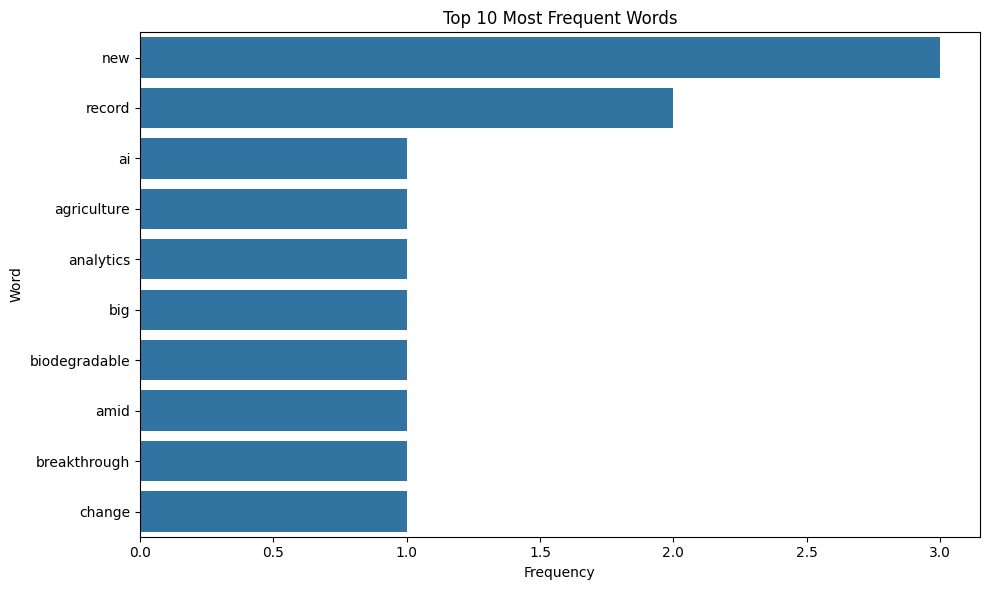

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=freq_df.head(10))
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

In [10]:
cos_sim = cosine_similarity(X)
cos_sim_df = pd.DataFrame(cos_sim, index=headlines, columns=headlines)

In [11]:

print("\nCosine Similarity Matrix:")
print(cos_sim_df.round(2))


Cosine Similarity Matrix:
                                                    AI outperforms doctors in diagnosing rare diseases  \
AI outperforms doctors in diagnosing rare diseases                                                1.0    
Stock markets hit new record highs amid global ...                                                0.0    
New vaccine shows promise in early trials                                                         0.0    
Climate change impacts agriculture across multi...                                                0.0    
Scientists develop biodegradable plastic from s...                                                0.0    
Sports teams adapt strategies with big data ana...                                                0.0    
Electric vehicles set new sales record worldwide                                                  0.0    
Breakthrough in quantum computing boosts encryp...                                                0.0    

                  

In [12]:
np.fill_diagonal(cos_sim, 0)
most_similar_idx = np.unravel_index(np.argmax(cos_sim), cos_sim.shape)
print("\nMost Similar Headlines:")
print(f"1. {headlines[most_similar_idx[0]]}")
print(f"2. {headlines[most_similar_idx[1]]}")


Most Similar Headlines:
1. Stock markets hit new record highs amid global optimism
2. Electric vehicles set new sales record worldwide
